In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('testresult1.csv')

C:\Users\gigi\AppData\Local\Temp/ipykernel_30444/2841624751.py:1: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('testresult1.csv')


In [3]:
df = df[df['responseCode'] != 401]  # filter out invalid requests
df

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1641234560338,2744,https://testsite.ro/#/login,200,NaN,Thread Group 1-2,text,True,NaN,10164666.0,4816.0,7.0,7.0,http://172.16.192.141:8080/#/login,47.0,0.0,14.0
1,1641234560338,47,https://testsite.ro/#/login-0,200,NaN,Thread Group 1-2,text,True,NaN,3910.0,503.0,7.0,7.0,http://172.16.192.141:8080/#/login,47.0,0.0,14.0
2,1641234560429,71,https://testsite.ro/#/login-1,200,NaN,Thread Group 1-2,bin,True,NaN,32433.0,514.0,7.0,7.0,http://172.16.192.141:8080/favicon.ico,58.0,0.0,16.0
3,1641234560429,158,https://testsite.ro/#/login-2,200,NaN,Thread Group 1-2,text,True,NaN,190134.0,537.0,7.0,7.0,http://172.16.192.141:8080/main-sass.d1d88034d...,60.0,0.0,14.0
4,1641234560430,45,https://testsite.ro/#/login-3,200,NaN,Thread Group 1-2,text,True,NaN,2626.0,539.0,7.0,7.0,http://172.16.192.141:8080/global-sass.d1d8803...,45.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64527,1641235102206,80035,https://testsite.ro/api/programs?size=100,500,NaN,Thread Group 1-49,text,False,NaN,1179.0,791.0,68.0,68.0,http://172.16.192.141:8080/api/programs?size=100,80035.0,0.0,13.0
64528,1641235102217,80038,inregistrarecerere,500,NaN,Thread Group 1-30,NaN,False,NaN,1179.0,791.0,66.0,66.0,NaN,0.0,0.0,0.0
64529,1641235102217,80038,https://testsite.ro/api/programs?size=100,500,NaN,Thread Group 1-30,text,False,NaN,1179.0,791.0,66.0,66.0,http://172.16.192.142:8080/api/programs?size=100,80038.0,0.0,16.0
64530,1641235102236,80034,inregistrarecerere,500,NaN,Thread Group 1-70,NaN,False,NaN,1179.0,800.0,65.0,65.0,NaN,0.0,0.0,0.0


Text(0.5, 1.0, 'Latency Graph')

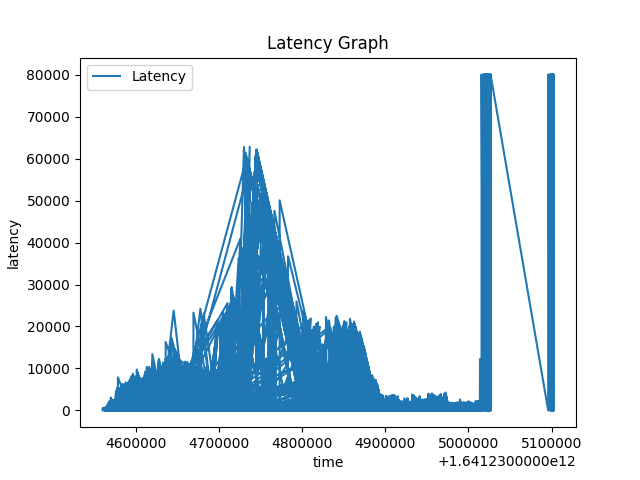

In [10]:
%matplotlib widget
ax = df.plot.line(x='timeStamp', y='Latency')
ax.set_xlabel('time')
ax.set_ylabel('latency')
ax.set_title('Latency Graph')

In [5]:
pt = (pd.pivot_table(df, values=['Latency', 'Connect'], index='label', aggfunc=[np.min, np.mean, np.max, np.std])
        .sort_values(('mean', 'Latency'), ascending=False))

In [6]:
pt

amin           \
                                                   Connect  Latency   
label                                                                 
https://testsite.ro/api/prj-submission/87c559d9...     0.0  11117.0   
https://testsite.ro/api/prj-submission/87c559d9...     0.0   5087.0   
https://testsite.ro/api/prj-submission/90c4e0ac...     0.0   3564.0   
https://testsite.ro/api/prj-submission/39950709...     0.0      0.0   
https://testsite.ro/api/prj-submission/2d19ad4e...     0.0      0.0   
https://testsite.ro/api/prj-submission/9316a7ad...     0.0      0.0   
https://testsite.ro/api/prj-submission/226e15d7...     0.0   3335.0   
https://testsite.ro/api/prj-submission/e72fdced...     0.0      0.0   
https://testsite.ro/api/document/upload5               0.0    481.0   
https://testsite.ro/api/document/upload6               0.0    840.0   
https://testsite.ro/api/prj-submission/4132cc8c...     0.0   3650.0   
https://testsite.ro/api/prj-submission/32301a44...     0.0   2364.0   
https://testsite.ro/api/prj-submission/2bc3c6a1...     0.0   2646.0   
https://testsite.ro/api/prj-submission/87c559d9...     0.0    465.0   
https://testsite.ro/api/call-statistics?size=8         0.0    517.0   
https://testsite.ro/api/document/upload4               0.0    601.0   
https://testsite.ro/api/document/upload1               0.0    535.0   
https://testsite.ro/api/document/upload7               0.0    529.0   
https://testsite.ro/api/document/upload9               0.0    188.0   
https://testsite.ro/api/document/upload8               0.0    253.0   
https://testsite.ro/api/prj-submission?programI...     0.0    219.0   
https://testsite.ro/api/document/upload2               0.0    345.0   
https://testsite.ro/api/prj-form-section-data          0.0    493.0   
https://testsite.ro/api/document/upload3               0.0    473.0   
https://testsite.ro/api/prj-submission                 0.0    162.0   
https://testsite.ro/api/call-4-projects/all?siz...     0.0    184.0   
https://testsite.ro/api/authenticate                   0.0    418.0   
https://testsite.ro/api/prj-submission/87c559d9...     0.0    237.0   
https://testsite.ro/api/prj-form-section-data/0...     0.0    159.0   
https://testsite.ro/api/programs?size=100              0.0     14.0   
https://testsite.ro/api/resources?page=0&size=2...     0.0     79.0   
https://testsite.ro/api/formio/form/7c014e42-2a...     0.0     60.0   
https://testsite.ro/api/notifications/count            0.0     43.0   
https://testsite.ro/#/login-8                          0.0     35.0   
https://testsite.ro/api/account                        0.0     23.0   
https://testsite.ro/api/resources?page=0&size=2...     0.0     39.0   
https://testsite.ro/#/login-4                          0.0     27.0   
https://testsite.ro/#/login-5                          0.0     27.0   
https://testsite.ro/#/login-3                          0.0     25.0   
https://testsite.ro/api/formio/form/7c014e42-2a...     0.0     28.0   
https://testsite.ro/#/login-6                          0.0     34.0   
https://testsite.ro/#/login-7                          0.0     48.0   
https://testsite.ro/#/login-1                          0.0     21.0   
https://testsite.ro/#/login                           13.0     38.0   
https://testsite.ro/#/login-0                         13.0     38.0   
https://testsite.ro/#/login-2                          0.0     26.0   
https://testsite.ro/i18n/ro.json?buildTimestamp...     0.0     21.0   
https://testsite.ro/websocket/info?access_token...     0.0     19.0   
https://testsite.ro/api/profile-info                   0.0     16.0   
https://testsite.ro/api/application-version            0.0     17.0   
inregistrarecerere                                     0.0      0.0   
inregistrarecererefinal                                0.0      0.0   
pasulurmatordocumente                                  0.0      0.0   
salvareinformatii                                      0.0      0.0   
salvare

In [12]:
df.describe()

,timeStamp,elapsed,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,4.718500e+04,47185.000000,0.0,4.718400e+04,4.718400e+04,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000
mean,1.641235e+12,2290.521352,NaN,4.650107e+04,3.472524e+04,98.131867,98.131867,1110.313390,1.014306,5.707274
std,1.077207e+05,9419.123399,NaN,5.652463e+05,3.398692e+05,10.371952,10.371952,5281.994653,19.598493,28.260855
min,1.641235e+12,0.000000,NaN,2.910000e+02,0.000000e+00,7.000000,7.000000,0.000000,0.000000,0.000000
25%,1.641235e+12,43.000000,NaN,2.920000e+02,7.950000e+02,100.000000,100.000000,0.000000,0.000000,0.000000
50%,1.641235e+12,627.000000,NaN,1.071000e+03,8.990000e+02,100.000000,100.000000,36.000000,0.000000,0.000000
75%,1.641235e+12,1282.000000,NaN,4.902000e+03,1.094000e+03,100.000000,100.000000,762.000000,0.000000,13.000000
max,1.641235e+12,164416.000000,NaN,1.016467e+07,6.439235e+06,100.000000,100.000000,80065.000000,1763.000000,2239.000000


In [14]:
df.agg({'Latency': ['min', 'mean', 'median', 'max', 'skew']})

,Latency
min,0.000000
mean,1110.313390
median,36.000000
max,80065.000000
skew,11.805279


In [16]:
df.groupby(by='label').describe()

timeStamp                \
                                                       count          mean   
label                                                                        
https://testsite.ro/#/login                            100.0  1.641235e+12   
https://testsite.ro/#/login-0                          100.0  1.641235e+12   
https://testsite.ro/#/login-1                          100.0  1.641235e+12   
https://testsite.ro/#/login-2                          100.0  1.641235e+12   
https://testsite.ro/#/login-3                          100.0  1.641235e+12   
https://testsite.ro/#/login-4                          100.0  1.641235e+12   
https://testsite.ro/#/login-5                          100.0  1.641235e+12   
https://testsite.ro/#/login-6                          100.0  1.641235e+12   
https://testsite.ro/#/login-7                          100.0  1.641235e+12   
https://testsite.ro/#/login-8                          100.0  1.641235e+12   
https://testsite.ro/api/account                        100.0  1.641235e+12   
https://testsite.ro/api/application-version            100.0  1.641235e+12   
https://testsite.ro/api/authenticate                   102.0  1.641235e+12   
https://testsite.ro/api/call-4-projects/all?siz...    5501.0  1.641235e+12   
https://testsite.ro/api/call-statistics?size=8         100.0  1.641235e+12   
https://testsite.ro/api/document/upload1               150.0  1.641235e+12   
https://testsite.ro/api/document/upload2               139.0  1.641235e+12   
https://testsite.ro/api/document/upload3               121.0  1.641235e+12   
https://testsite.ro/api/document/upload4               116.0  1.641235e+12   
https://testsite.ro/api/document/upload5               109.0  1.641235e+12   
https://testsite.ro/api/document/upload6               108.0  1.641235e+12   
https://testsite.ro/api/document/upload7               104.0  1.641235e+12   
https://testsite.ro/api/document/upload8               103.0  1.641235e+12   
https://testsite.ro/api/document/upload9                99.0  1.641235e+12   
https://testsite.ro/api/formio/form/7c014e42-2a...     160.0  1.641235e+12   
https://testsite.ro/api/formio/form/7c014e42-2a...     160.0  1.641235e+12   
https://testsite.ro/api/notifications/count            100.0  1.641235e+12   
https://testsite.ro/api/prj-form-section-data          154.0  1.641235e+12   
https://testsite.ro/api/prj-form-section-data/0...     160.0  1.641235e+12   
https://testsite.ro/api/prj-submission                5254.0  1.641235e+12   
https://testsite.ro/api/prj-submission/226e15d7...     120.0  1.641235e+12   
https://testsite.ro/api/prj-submission/2bc3c6a1...     142.0  1.641235e+12   
https://testsite.ro/api/prj-submission/2d19ad4e...     111.0  1.641235e+12   
https://testsite.ro/api/prj-submission/32301a44...     132.0  1.641235e+12   
https://testsite.ro/api/prj-submission/39950709...      97.0  1.641235e+12   
https://testsite.ro/api/prj-submission/4132cc8c...     104.0  1.641235e+12   
https://testsite.ro/api/prj-submission/87c559d9...     875.0  1.641235e+12   
https://testsite.ro/api/prj-submission/87c559d9...      95.0  1.641235e+12   
https://testsite.ro/api/prj-submission/87c559d9...     160.0  1.641235e+12   
https://testsite.ro/api/prj-submission/87c559d9...      95.0  1.641235e+12   
https://testsite.ro/api/prj-submission/90c4e0ac...     108.0  1.641235e+12   
https://testsite.ro/api/prj-submission/9316a7ad...     100.0  1.641235e+12   
https://testsite.ro/api/prj-submission/e72fdced...     107.0  1.641235e+12   
https://testsite.ro/api/prj-submission?programI...     195.0  1.641235e+12   
https://testsite.ro/api/profile-info                   100.0  1.641235e+12   
https://testsite.ro/api/programs?size=100            12237.0  1.641235e+12   
https://testsite.ro/api/resources?page=0&size=2...     160.0  1.641235e+12   
https://testsite.ro/api/resources?page=0&size=2...     160.0  1.641235e+12   
https://testsite.ro/i18n/ro.json?buildTimestamp...     100.0  1.641235e+1

In [24]:
df.groupby(by='label').agg({'Latency': ['min', 'mean', 'median', 'max', 'skew']}).sort_values(by=('Latency', 'mean'), ascending=False)

Latency                \
                                                        min          mean   
label                                                                       
https://testsite.ro/api/prj-submission/87c559d9...  11117.0  24542.389474   
https://testsite.ro/api/prj-submission/87c559d9...   5087.0  21339.389474   
https://testsite.ro/api/prj-submission/90c4e0ac...   3564.0  10470.203704   
https://testsite.ro/api/prj-submission/39950709...      0.0  10385.958763   
https://testsite.ro/api/prj-submission/2d19ad4e...      0.0   9937.657658   
https://testsite.ro/api/prj-submission/9316a7ad...      0.0   9438.690000   
https://testsite.ro/api/prj-submission/226e15d7...   3335.0   9273.625000   
https://testsite.ro/api/prj-submission/e72fdced...      0.0   9007.794393   
https://testsite.ro/api/document/upload5              481.0   8785.623853   
https://testsite.ro/api/document/upload6              840.0   8677.481481   
https://testsite.ro/api/prj-submission/4132cc8c...   3650.0   8063.461538   
https://testsite.ro/api/prj-submission/32301a44...   2364.0   7825.946970   
https://testsite.ro/api/prj-submission/2bc3c6a1...   2646.0   7724.274648   
https://testsite.ro/api/prj-submission/87c559d9...    465.0   7600.504000   
https://testsite.ro/api/call-statistics?size=8        517.0   5644.220000   
https://testsite.ro/api/document/upload4              601.0   5106.741379   
https://testsite.ro/api/document/upload1              535.0   4090.253333   
https://testsite.ro/api/document/upload7              529.0   3424.182692   
https://testsite.ro/api/document/upload9              188.0   3328.939394   
https://testsite.ro/api/document/upload8              253.0   2038.631068   
https://testsite.ro/api/prj-submission?programI...    219.0   1976.800000   
https://testsite.ro/api/document/upload2              345.0   1628.359712   
https://testsite.ro/api/prj-form-section-data         493.0   1535.097403   
https://testsite.ro/api/document/upload3              473.0   1531.694215   
https://testsite.ro/api/prj-submission                162.0   1488.349448   
https://testsite.ro/api/call-4-projects/all?siz...    184.0   1321.411380   
https://testsite.ro/api/authenticate                  418.0   1092.696078   
https://testsite.ro/api/prj-submission/87c559d9...    237.0   1020.993750   
https://testsite.ro/api/prj-form-section-data/0...    159.0    901.875000   
https://testsite.ro/api/programs?size=100              14.0    877.677672   
https://testsite.ro/api/resources?page=0&size=2...     79.0    325.706250   
https://testsite.ro/api/formio/form/7c014e42-2a...     60.0    288.118750   
https://testsite.ro/api/notifications/count            43.0    183.920000   
https://testsite.ro/#/login-8                          35.0    166.720000   
https://testsite.ro/api/account                        23.0    139.610000   
https://testsite.ro/api/resources?page=0&size=2...     39.0    139.125000   
https://testsite.ro/#/login-4                          27.0    136.850000   
https://testsite.ro/#/login-5                          27.0    128.280000   
https://testsite.ro/#/login-3                          25.0    123.310000   
https://testsite.ro/api/formio/form/7c014e42-2a...     28.0    119.387500   
https://testsite.ro/#/login-6                          34.0    112.470000   
https://testsite.ro/#/login-7                          48.0    108.980000   
https://testsite.ro/#/login-1                          21.0    104.560000   
https://testsite.ro/#/login                            38.0     96.830000   
https://testsite.ro/#/login-0                          38.0     96.830000   
https://testsite.ro/#/login-2                          26.0     84.440000   
https://testsite.ro/i18n/ro.json?buildTimestamp...     21.0     65.200000   
https://testsite.ro/websocket/info?access_token...     19.0     50.900000   
https://testsite.ro/api/profile-info                   16.0     45.320000   
https://testsite.ro/api/application-version     

In [7]:
ptg = pd.pivot_table(df, values=['Latency'], columns=['label'], index=['timeStamp'], aggfunc=[np.mean])

In [17]:
ptg

mean                                \
                                  Latency                                 
label         https://testsite.ro/#/login https://testsite.ro/#/login-0   
timeStamp                                                                 
1641234560027                       541.0                         541.0   
1641234560338                        47.0                          47.0   
1641234560429                         NaN                           NaN   
1641234560430                         NaN                           NaN   
1641234560486                         NaN                           NaN   
...                                   ...                           ...   
1641235102204                         NaN                           NaN   
1641235102205                         NaN                           NaN   
1641235102206                         NaN                           NaN   
1641235102217                         NaN                           NaN   
1641235102236                         NaN                           NaN   

                                                                           \
                                                                            
label         https://testsite.ro/#/login-1 https://testsite.ro/#/login-2   
timeStamp                                                                   
1641234560027                           NaN                           NaN   
1641234560338                           NaN                           NaN   
1641234560429                          58.0                          60.0   
1641234560430                           NaN                           NaN   
1641234560486                           NaN                           NaN   
...                                     ...                           ...   
1641235102204                           NaN                           NaN   
1641235102205                           NaN                           NaN   
1641235102206                           NaN                           NaN   
1641235102217                           NaN                           NaN   
1641235102236                           NaN                           NaN   

                                                                           \
                                                                            
label         https://testsite.ro/#/login-3 https://testsite.ro/#/login-4   
timeStamp                                                                   
1641234560027                           NaN                           NaN   
1641234560338                           NaN                           NaN   
1641234560429                           NaN                           NaN   
1641234560430                          45.0                          55.0   
1641234560486                           NaN                           NaN   
...                                     ...                           ...   
1641235102204                           NaN                           NaN   
1641235102205                           NaN                           NaN   
1641235102206                           NaN                           NaN   
1641235102217                           NaN                           NaN   
1641235102236                           NaN                           NaN   

                                                                           \
                                                                            
label         https://testsite.ro/#/login-5 https://testsite.ro/#/login-6   
timeStamp                                                                   
1641234560027                           NaN                           NaN   
1641234560338                           NaN                           NaN   
1641234560429                          61.0                          34.0   
1641234560430                           NaN                 

In [8]:
ptg.reset_index()

timeStamp                        mean  \
                                         Latency   
label                https://testsite.ro/#/login   
0      1641234560027                       541.0   
1      1641234560338                        47.0   
2      1641234560429                         NaN   
3      1641234560430                         NaN   
4      1641234560486                         NaN   
...              ...                         ...   
24568  1641235102204                         NaN   
24569  1641235102205                         NaN   
24570  1641235102206                         NaN   
24571  1641235102217                         NaN   
24572  1641235102236                         NaN   

                                                                   \
                                                                    
label https://testsite.ro/#/login-0 https://testsite.ro/#/login-1   
0                             541.0                           NaN   
1                              47.0                           NaN   
2                               NaN                          58.0   
3                               NaN                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
24568                           NaN                           NaN   
24569                           NaN                           NaN   
24570                           NaN                           NaN   
24571                           NaN                           NaN   
24572                           NaN                           NaN   

                                                                   \
                                                                    
label https://testsite.ro/#/login-2 https://testsite.ro/#/login-3   
0                               NaN                           NaN   
1                               NaN                           NaN   
2                              60.0                           NaN   
3                               NaN                          45.0   
4                               NaN                           NaN   
...                             ...                           ...   
24568                           NaN                           NaN   
24569                           NaN                           NaN   
24570                           NaN                           NaN   
24571                           NaN                           NaN   
24572                           NaN                           NaN   

                                                                   \
                                                                    
label https://testsite.ro/#/login-4 https://testsite.ro/#/login-5   
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                          61.0   
3                              55.0                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
24568                           NaN                           NaN   
24569                           NaN                           NaN   
24570                           NaN                           NaN   
24571                           NaN                           NaN   
24572                           NaN                           NaN   

                                                                   ...  \
                                                                   ...   
label https://testsite.ro/#/login-6 https://testsite.ro/#/login-7  ...   
0                               NaN                           NaN  ...   
1                               NaN                           NaN  ...   
2          

Text(0.5, 1.0, 'Group latency')

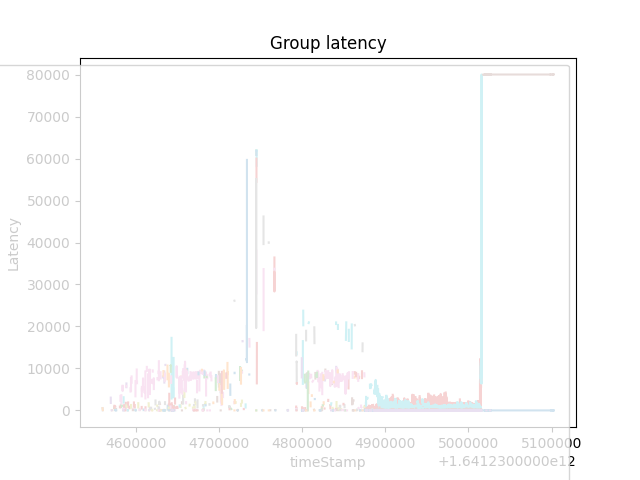

In [20]:
%matplotlib widget
ax2 = ptg.plot.line()
ax2.set_xlabel('timeStamp')
ax2.set_ylabel('Latency')
ax2.set_title('Group latency')